In [1]:
#Imprting the importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# loading the titanic dataset
df = pd.read_csv('titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning 

In [3]:
# checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## there are total 86 values missing in the age column and 327 values from cabin column

In [4]:
# handling the missing values
# filling the missing the values with median values in age column
df.fillna(df['Age'].median(),inplace=True)

In [5]:
# droppping unwanted columns from dataset
df.drop(['Name','Embarked','Cabin','Ticket'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,0,3,male,34.5,0,0,7.8292
1,893,1,3,female,47.0,1,0,7.0000
2,894,0,2,male,62.0,0,0,9.6875
3,895,0,3,male,27.0,0,0,8.6625
4,896,1,3,female,22.0,1,1,12.2875


In [6]:
# changing male to 0 and female to 1
df['Sex'] = df['Sex'].replace({'male':0,'female':1})
df.head()

C:\Users\bhagi\AppData\Local\Temp\ipykernel_14640\420739866.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male':0,'female':1})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,0,3,0,34.5,0,0,7.8292
1,893,1,3,1,47.0,1,0,7.0000
2,894,0,2,0,62.0,0,0,9.6875
3,895,0,3,0,27.0,0,0,8.6625
4,896,1,3,1,22.0,1,1,12.2875


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,29.599282,0.447368,0.392344,35.606549
std,120.810458,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.842095
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.shape

(418, 8)

In [9]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [10]:
# display the columns of the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

# Exploratory Data Analysis(EDA)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

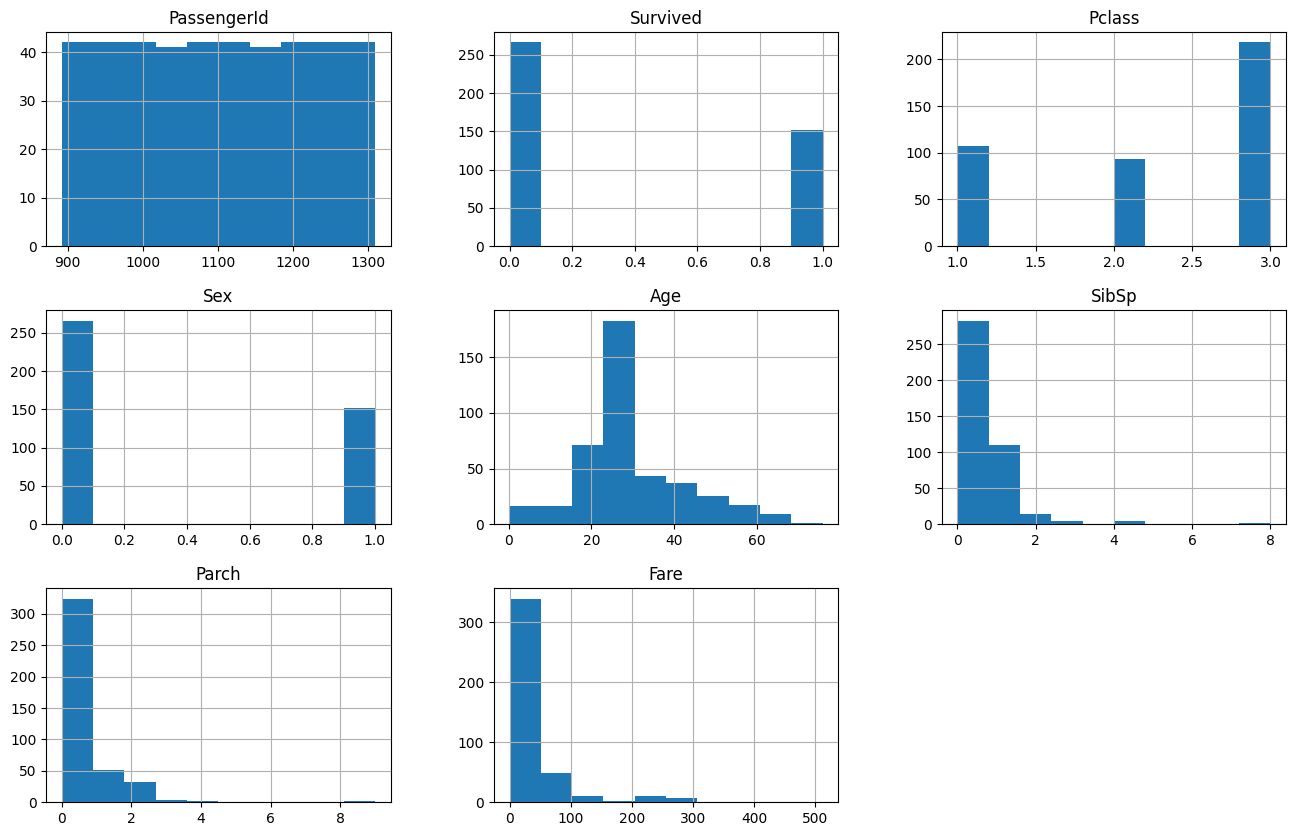

In [11]:
df.hist(figsize=(16,10))

<Axes: >

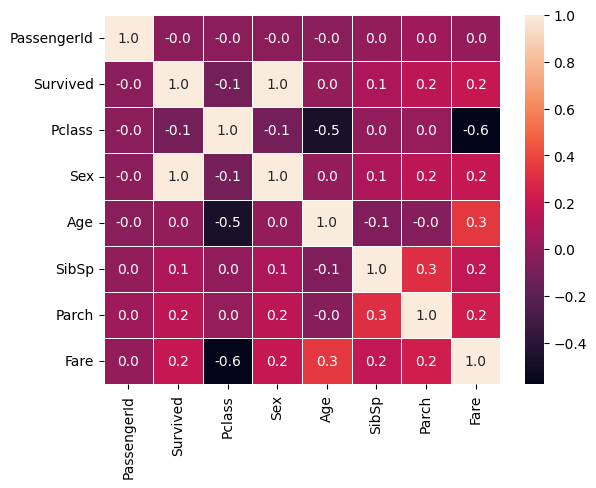

In [14]:
# plotting the heatmap to understand the inter-relationships betweens features in the dataset
co = df.corr()
sns.heatmap(co,annot=True,fmt='.1f',linewidth=.5)

<Axes: xlabel='Survived', ylabel='count'>

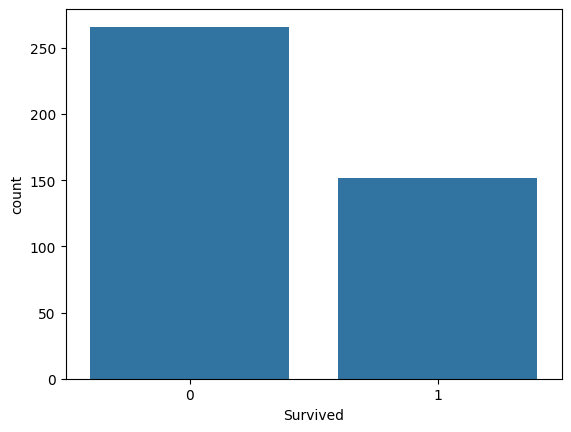

In [16]:
# plotting the count plot to analyze between the survived and died passengers
sns.countplot(x='Survived',data=df)


# insights : More Died than Survived

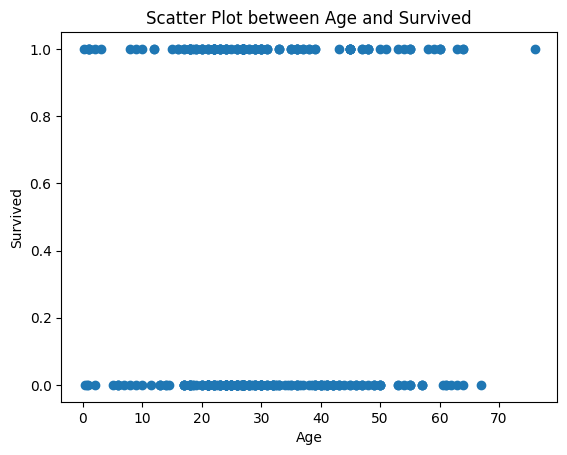

In [17]:
# assuming df is the our dataframe and column1 and column2 are the columns of our interest
# plotting the scatter plot for two columns that is Age and Survived
plt.scatter(df['Age'],df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Scatter Plot between Age and Survived')
plt.show()

<Axes: ylabel='count'>

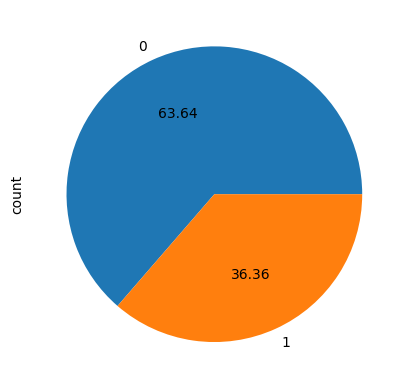

In [18]:
# plotting pie chart to compare the count of deaths between male and female
df.Sex.value_counts().plot.pie(autopct='%0.2f')

# the count of male deaths is higher than female

<Axes: xlabel='Pclass', ylabel='count'>

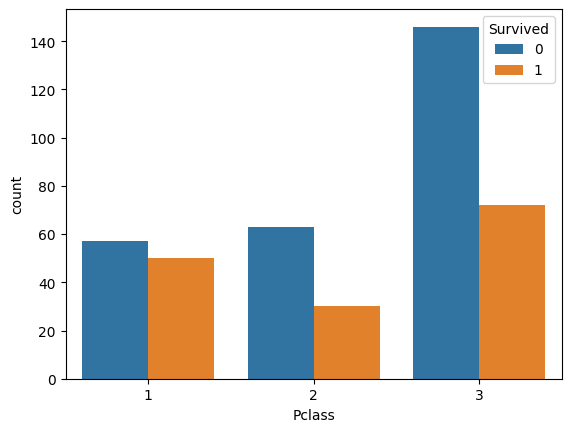

In [19]:
# plotting the countplot to compare the count of deaths between class (1,2,3)
sns.countplot(x=df.Pclass,data=df,hue=df.Survived)

# the count of class 3 deaths is more than class 1,2

<Axes: xlabel='Age', ylabel='Count'>

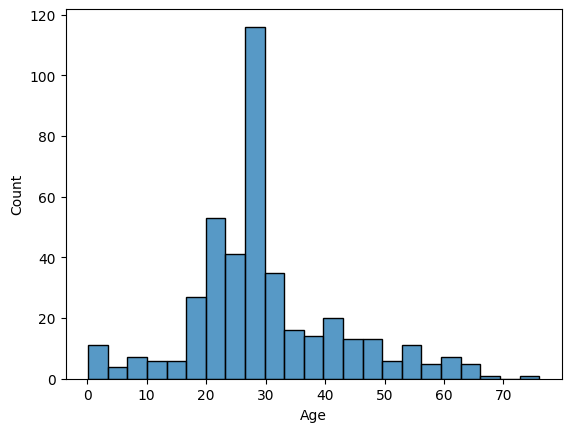

In [20]:
# plotting the histogram for Age column
sns.histplot(df.Age)